In [62]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
galaxies_full = pd.read_csv("galaxydatabase.csv", encoding = "ISO-8859-1")
renamed = galaxies_full.rename(columns={galaxies_full.columns[3]: "Distance"})
galaxies = renamed[["Name", "Distance", "RadRa", "RadDec"]]
galaxies["Distance"][0] = 9811.0
galaxies

/var/folders/0l/z1_8qd391x5dry1z7c9fk3c80000gn/T/ipykernel_1249/3066824220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galaxies["Distance"][0] = 9811.0


,Name,Distance,RadRa,RadDec
0,NGC 628,9811.0,0.418879,0.275471
1,NGC 477,101000.0,0.353429,0.706567
2,NGC 364,101900.0,0.279253,-0.013963
3,NGC 64,102000.0,0.074176,-0.118973
4,NGC 90,102350.0,0.091630,0.390954
...,...,...,...,...
389,NGC 934,96300.0,0.641409,-0.004072
390,NGC 409,96400.0,0.301069,-0.624828
391,NGC 2,96800.0,0.030543,0.482874
392,NGC 223,97700.0,0.183260,0.014544


In [4]:
transposed = galaxies.transpose()
transposed

,0,1,2,3,4,5,6,7,8,9,...,384,385,386,387,388,389,390,391,392,393
Name,NGC 628,NGC 477,NGC 364,NGC 64,NGC 90,NGC 949,NGC 850,NGC 631,NGC 102,NGC 334,...,NGC 325,NGC 66,NGC 799,NGC 653,NGC 431,NGC 934,NGC 409,NGC 2,NGC 223,NGC 219
Distance,9811.0,101000.0,101900.0,102000.0,102350.0,10300.0,103000.0,103850.0,104000.0,104000.0,...,94550.0,94600.0,95000.0,96000.0,96150.0,96300.0,96400.0,96800.0,97700.0,98300.0
RadRa,0.418879,0.353429,0.279253,0.074176,0.09163,0.654498,0.571595,0.418879,0.10472,0.253073,...,0.248709,0.082903,0.532325,0.445059,0.322886,0.641409,0.301069,0.030543,0.18326,0.18326
RadDec,0.275471,0.706567,-0.013963,-0.118973,0.390954,0.648099,-0.025889,0.101811,-0.243473,-0.612611,...,-0.089012,-0.400262,-0.001745,0.621919,0.588176,-0.004072,-0.624828,0.482874,0.014544,0.015708


In [5]:
rad = np.pi/2
g1RA = galaxies.loc[0, "RadRa"]
g2RA = transposed.loc["RadRa", 1]
g1DC = galaxies.loc[0, "RadDec"]
g2DC = transposed.loc["RadDec", 1]

cosofgamma = np.cos(rad - g1DC)*np.cos(rad - g2DC) + np.sin(rad - g1DC)*np.sin(rad - g2DC)*np.cos(g1RA - g2RA)
cosofgamma

0.9069410844937071

In [6]:
def cos_of_gamma():
    gammas = {}
    rad = np.pi/2
    count = 1
    for i in range(len(galaxies)):
        g1RA = galaxies.loc[i, "RadRa"]
        g1DC = galaxies.loc[i, "RadDec"]
        for j in range(len(transposed)):
            one_row = []
            g2RA = transposed.loc["RadRa", j]
            g2DC = transposed.loc["RadDec", j]
            
            one_cos_gamma = np.cos(rad - g1DC)*np.cos(rad - g2DC) + np.sin(rad - g1DC)*np.sin(rad - g2DC)*np.cos(g1RA - g2RA)
            gammas = np.append(gammas, one_cos_gamma)
    return gammas
    
        
# dict[counter] = [one row of gammas]
# create dictionary from nested for loops

In [7]:
cosines_of_gamma = cos_of_gamma()
cosines_of_gamma[0] = 1

In [8]:
# we want: a dictionary that contains the calculated cosine of gamma and the associated galaxies

{0: [1, "NGC", "NGC"],
 1: [.906, "NGC", "NGC"]
}

{0: [1, 'NGC', 'NGC'], 1: [0.906, 'NGC', 'NGC']}

In [9]:
gammas = {}
cos_value = []
name = []
rad = np.pi/2
for i in np.arange(394):
    g1RA = galaxies.loc[i, "RadRa"]
    g1DC = galaxies.loc[i, "RadDec"]
    g1name = galaxies.loc[i, "Name"]
              
    for j in np.arange(394):
        
        g2RA = transposed.loc["RadRa", j]
        g2DC = transposed.loc["RadDec", j]
        g2name = transposed.loc["Name", j]
            
        one_cos_gamma = np.cos(rad - g1DC)*np.cos(rad - g2DC) + np.sin(rad - g1DC)*np.sin(rad - g2DC)*np.cos(g1RA - g2RA)
        one_cos_gamme = np.clip(one_cos_gamma, -1, 1)
        cos_value.append(one_cos_gamma)
        name.append((g1name, g2name))
        

for i in np.arange(len(cos_value)):
    if cos_value[i] > 1:
        cos_value[i] = 1

gamma_vals = np.arccos(cos_value)
        
gammas = {gamma: name for gamma, name in zip(gamma_vals, name) if gamma != 0}

gammas

{0.4348313874414994: ('NGC 477', 'NGC 628'),
 0.32061576104667927: ('NGC 364', 'NGC 628'),
 0.521637828740084: ('NGC 64', 'NGC 628'),
 0.3297489581495029: ('NGC 90', 'NGC 628'),
 0.42708570494633713: ('NGC 949', 'NGC 628'),
 0.3370398333707846: ('NGC 850', 'NGC 628'),
 0.17366026099999907: ('NGC 631', 'NGC 628'),
 0.604767984449866: ('NGC 102', 'NGC 628'),
 0.9019208937662232: ('NGC 334', 'NGC 628'),
 0.43681558993431585: ('NGC 647', 'NGC 628'),
 0.5371770720870267: ('NGC 286', 'NGC 628'),
 1.2059096217223364: ('NGC 312', 'NGC 628'),
 0.4072973736443132: ('NGC 959', 'NGC 628'),
 0.42319794424558915: ('NGC 342', 'NGC 628'),
 0.8982045453620192: ('NGC 365', 'NGC 628'),
 0.29679669815266163: ('NGC 497', 'NGC 628'),
 0.45602795971785454: ('NGC 567', 'NGC 628'),
 0.6384311515595849: ('NGC 73', 'NGC 628'),
 0.382497991509353: ('NGC 861', 'NGC 628'),
 0.9001720945039354: ('NGC 131', 'NGC 628'),
 0.6243093430547499: ('NGC 967', 'NGC 628'),
 1.2730229622239138: ('NGC 215', 'NGC 628'),
 0.385959

In [10]:
gammas_table = pd.DataFrame(gammas).transpose().reset_index().rename(columns={"index": "Gamma", 0:"G1", 1:"G2"})
gammas_table

,Gamma,G1,G2
0,0.434831,NGC 477,NGC 628
1,0.320616,NGC 364,NGC 628
2,0.521638,NGC 64,NGC 628
3,0.329749,NGC 90,NGC 628
4,0.427086,NGC 949,NGC 628
...,...,...,...
72292,1.136697,NGC 2,NGC 409
72293,0.648734,NGC 223,NGC 409
72294,0.649883,NGC 219,NGC 409
72295,0.490671,NGC 223,NGC 2


In [11]:
distances = {}
name_dists = []
distances1 = []
count = 0

for i in np.arange(394):
    g1name = galaxies.loc[i, "Name"]
    d1 = galaxies.loc[i, "Distance"]
              
    for j in np.arange(394):
        
        count += 1
        g2name = transposed.loc["Name", j]
        d2 = transposed.loc["Distance", j]
        gamma = gamma_vals[count - 1]
            
        one_distance_between = np.sqrt((d1**2) + (d2**2) - 2*d1*d2*np.cos(gamma))
        
        distances1.append(one_distance_between*3261.5637769443)
        name_dists.append((g1name, g2name))

        
distances = {distance_between: name for distance_between, name in zip(distances1, name_dists) if distance_between != 0}
        
distances

{300698844.75387746: ('NGC 477', 'NGC 628'),
 302153113.723682: ('NGC 364', 'NGC 628'),
 305352668.75396293: ('NGC 64', 'NGC 628'),
 303722643.5886271: ('NGC 90', 'NGC 628'),
 13987883.940324714: ('NGC 949', 'NGC 628'),
 305925285.4991126: ('NGC 850', 'NGC 628'),
 307245252.8680438: ('NGC 631', 'NGC 628'),
 313407536.3972206: ('NGC 102', 'NGC 628'),
 320344953.9660331: ('NGC 334', 'NGC 628'),
 310503292.1216843: ('NGC 647', 'NGC 628'),
 315397209.3837798: ('NGC 286', 'NGC 628'),
 335640832.80738354: ('NGC 312', 'NGC 628'),
 13824480.40374289: ('NGC 959', 'NGC 628'),
 320080965.45635164: ('NGC 342', 'NGC 628'),
 330001942.2044176: ('NGC 365', 'NGC 628'),
 318524691.5924876: ('NGC 497', 'NGC 628'),
 320568046.1019497: ('NGC 567', 'NGC 628'),
 325480841.0293672: ('NGC 73', 'NGC 628'),
 322783136.8956725: ('NGC 861', 'NGC 628'),
 29982915.42122686: ('NGC 131', 'NGC 628'),
 343103843.7223744: ('NGC 967', 'NGC 628'),
 363718679.819746: ('NGC 215', 'NGC 628'),
 352163772.2468237: ('NGC 331', 

In [12]:
distances_table = pd.DataFrame(distances).transpose().reset_index().rename(columns={"index": "Distance", 0: "G1", 1:"G2"})
distances_table


,Distance,G1,G2
0,3.006988e+08,NGC 477,NGC 628
1,3.021531e+08,NGC 364,NGC 628
2,3.053527e+08,NGC 64,NGC 628
3,3.037226e+08,NGC 90,NGC 628
4,1.398788e+07,NGC 949,NGC 628
...,...,...,...
73924,2.018050e+08,NGC 223,NGC 409
73925,2.028195e+08,NGC 219,NGC 409
73926,1.541044e+08,NGC 223,NGC 2
73927,1.542823e+08,NGC 219,NGC 2


In [13]:
master_table = distances_table.merge(gammas_table)
master_table

,Distance,G1,G2,Gamma
0,3.006988e+08,NGC 477,NGC 628,0.434831
1,3.021531e+08,NGC 364,NGC 628,0.320616
2,3.053527e+08,NGC 64,NGC 628,0.521638
3,3.037226e+08,NGC 90,NGC 628,0.329749
4,1.398788e+07,NGC 949,NGC 628,0.427086
...,...,...,...,...
72291,2.018050e+08,NGC 223,NGC 409,0.648734
72292,2.028195e+08,NGC 219,NGC 409,0.649883
72293,1.541044e+08,NGC 223,NGC 2,0.490671
72294,1.542823e+08,NGC 219,NGC 2,0.489557


In [83]:
grav_bound = master_table.rename(columns = {"Distance": "Distance (ly)"}).loc[(master_table["Distance"] <= 2537000) & (master_table["Gamma"] >= 0.00465)].reset_index().drop(columns = "index")
grav_bound

,Distance (ly),G1,G2,Gamma
0,1.652946e+06,NGC 959,NGC 949,0.029644
1,1.432211e+06,NGC 693,NGC 676,0.009587
2,1.915582e+06,NGC 615,NGC 636,0.017550
3,2.289657e+06,NGC 205,NGC 292,1.998734
4,2.287100e+06,NGC 221,NGC 292,1.984090
5,2.288372e+06,NGC 224,NGC 292,1.991361
6,2.355140e+06,NGC 598,NGC 292,1.810007
7,1.163615e+06,NGC 547,NGC 538,0.005773
8,2.197333e+06,NGC 565,NGC 547,0.008744
9,3.509946e+04,NGC 221,NGC 205,0.015955


In [20]:
grouped_g1 = grav_bound.groupby("G1")["G2"].count()
grouped_g1

G1
NGC 205    1
NGC 221    2
NGC 224    3
NGC 508    1
NGC 547    1
NGC 565    1
NGC 598    4
NGC 615    1
NGC 693    1
NGC 959    1
Name: G2, dtype: int64

In [19]:
grouped_g2 = grav_bound.groupby("G2")["G1"].count()
grouped_g2

G2
NGC 205    3
NGC 221    2
NGC 224    1
NGC 292    4
NGC 515    1
NGC 538    1
NGC 547    1
NGC 636    1
NGC 676    1
NGC 949    1
Name: G1, dtype: int64

In [56]:
g1_df = pd.DataFrame(grouped_g1).reset_index().rename(columns = {"G1":"Name", "G2": "Count"})
g1_df

,Name,Count
0,NGC 205,1
1,NGC 221,2
2,NGC 224,3
3,NGC 508,1
4,NGC 547,1
5,NGC 565,1
6,NGC 598,4
7,NGC 615,1
8,NGC 693,1
9,NGC 959,1


In [57]:
g2_df = pd.DataFrame(grouped_g2).reset_index().rename(columns = {"G2":"Name", "G1": "Count"})
g2_df

,Name,Count
0,NGC 205,3
1,NGC 221,2
2,NGC 224,1
3,NGC 292,4
4,NGC 515,1
5,NGC 538,1
6,NGC 547,1
7,NGC 636,1
8,NGC 676,1
9,NGC 949,1


In [58]:
pair_counts = g1_df.merge(g2_df)
pair_counts

,Name,Count
0,NGC 221,2
1,NGC 547,1


In [65]:
concatenated = pd.concat([g1_df, g2_df], ignore_index = True).drop([10, 11, 12, 16], axis = 0)
concatenated.loc[0, "Count"] = 4
concatenated.loc[1, "Count"] = 4
concatenated.loc[2, "Count"] = 4
concatenated.loc[4, "Count"] = 2
sorted = concatenated.sort_values("Count", ascending = False)
sorted

,Name,Count
0,NGC 205,4
1,NGC 221,4
2,NGC 224,4
6,NGC 598,4
13,NGC 292,4
4,NGC 547,2
3,NGC 508,1
5,NGC 565,1
7,NGC 615,1
8,NGC 693,1


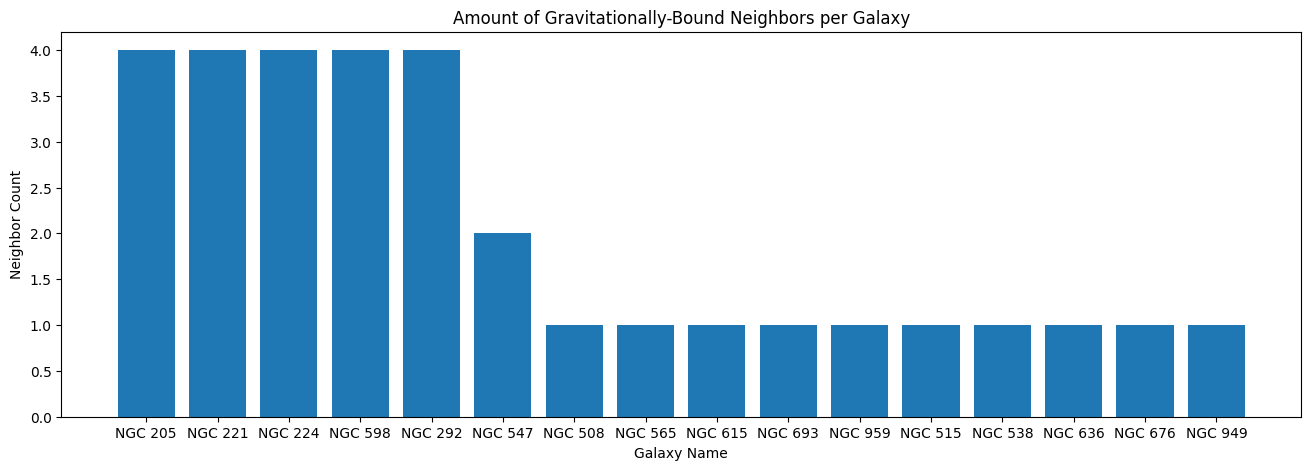

In [78]:
plt.figure(figsize = (16, 5))

plt.bar(x = sorted["Name"], height = sorted["Count"])
plt.title("Amount of Gravitationally-Bound Neighbors per Galaxy")
plt.xlabel("Galaxy Name")
plt.ylabel("Neighbor Count")


plt.show()